# Bokehの基本

Bokehはブラウザでチャートを表示するための可視化拡張ライブラリで、その描画作業はブラウザ内でJavaScriptによって行われます。Pythonはチャートのデータ構造を生成し、チャート内のデータを更新する役割を担います。  

Matplotlibと比較すると、Bokehはインタラクティブな機能に優れており、ツールチップ、ズーム、パンなどの操作が容易に実装できます。また、Bokehは標準でWebブラウザへの出力をサポートしており、スタンドアローンのHTMLファイルとして保存したり、FlaskやDjangoなどのWebアプリケーションに組み込むことができます。一方、Matplotlibは静的な画像の生成が主であり、対話的な機能は弱いです。

In [2]:
import numpy as np
import helper.magics
import bokeh
from bokeh.plotting import output_notebook, figure, show, save
output_notebook()

Loading BokehJS ...

## チャートの表示方法

Bokehには以下の4つの使用シナリオがあります：

1. Notebook内でPythonを使用してチャートを作成し、表示します。チャートはセルの出力欄に表示されます。
2. チャートをHTMLファイルとして出力します。チャートの情報はJSON形式でHTMLファイルに保存され、Pythonがインストールされていないコンピュータでもブラウザでチャートを表示でき、パンやズームなどのインタラクティブ機能をサポートします。
3. Notebook内でチャートを表示した後、Pythonでチャートデータを更新し、ブラウザに送信してチャートを更新することができます。
4. Bokehのサーバーを使用して、Pythonスクリプトで生成されたチャートアプリケーションをネットワーク上で公開します。ネットワーク内の任意のコンピュータが指定されたURLでアプリケーションを開くことができます。Bokehはボタン、テキスト入力ボックス、ドロップダウン選択ボックスなど、インターフェースプログラムを作成するためのさまざまなコントロールを提供しているため、Bokehサーバーを使用して複数のユーザーが同時に使用できるインタラクティブなグラフィカルインターフェースアプリケーションを作成することができます。

このセクションでは、まずいくつかの簡単な例を通じて上記の各シナリオの使用方法を紹介します。

### Notebook内で表示

Notebook内でBokehチャートを表示するためには、まず`output_notebook()`を実行する必要があります。これにより、ネットワークからBokehのJavascriptコードがロードされます。もし読者のコンピュータがネットワークに接続されていない場合は、本章の最後のセクションを参照してください。

In [3]:
import bokeh
from bokeh.plotting import output_notebook, figure, show, save
output_notebook()

Loading BokehJS ...

以下のプログラムは2つの曲線を表示します。❶まず`figure()`を使用して`Figure`オブジェクト`fig`を作成します。❷`line()`メソッドを呼び出して曲線を表すオブジェクトを作成します。その2つの位置引数は、画像上の各点のX軸座標とY軸座標です。❸`Figure`オブジェクトの属性を通じてチャート内のさまざまなオブジェクトにアクセスできます。ここでは`fig.legend[0]`を使用して凡例オブジェクトを取得し、その`update()`メソッドを呼び出して関連する属性を設定します。❹最後に`show()`を呼び出してチャートオブジェクトを表示します。結果は次のグラフに示されています。

Bokehオブジェクトの属性は、オブジェクト作成時にキーワード引数で指定できます。例えば以下の例の`x_range`、`color`、`line_width`などの属性です。または`update()`を使用して複数の属性を同時に設定することもできます。例えば`location`と`orientation`などです。

In [4]:
def plot_demo():
    x = np.linspace(-2, 2, 400)
    fig = figure(width=500, height=300, title="正弦余弦曲線", x_range=(0, 1)) #❶
    line_sin = fig.line(x, np.sin(2*np.pi*x), color="red", legend_label="sin", line_width=2, name="sin")   #❷
    line_cos = fig.line(x, np.cos(2*np.pi*x), color="green", legend_label="cos", line_width=2, name="cos")
    fig.legend[0].update(location="bottom_left", orientation="horizontal")     #❸
    return fig, (line_sin, line_cos)

fig, _ = plot_demo()
show(fig)  #❹

`save()`を呼び出すと、チャートをHTMLファイルとして保存できます。前述のコードを複数回呼び出すと、ブラウザ内で古いチャートが新しいチャートに上書きされても、Python内で複数の`Figure`オブジェクトが生成され、これらの`Figure`オブジェクトはすべて現在の`Document`オブジェクトに保存されます。`save()`は現在の`Document`オブジェクト内のすべてのチャートをHTMLファイルに保存します。❶現在の`Document`オブジェクトは`curdoc()`で取得でき、その`clear()`メソッドを呼び出すと、その中のすべてのチャートがクリアされます。❷`save()`を呼び出してチャートを保存する際、`resources=CDN`を設定すると、BokehのJavascriptとCSSファイルがネットワーク上のCDNサーバーからダウンロードされます。これによりHTMLファイルのサイズを小さくできますが、ユーザーがチャートを表示する際にはネットワーク接続が必要です。

In [5]:
from bokeh.resources import CDN
from bokeh.plotting import curdoc
curdoc().clear() #❶
save(fig, "sincos.html", resources=CDN, title="Plots"); #❷

### Javascriptでチャートの更新

Bokeh は、グラフィカルインターフェースを構成するためのさまざまなコントロールを提供し、JavaScript 内でチャートやコントロールが生成するさまざまなイベントに応答できます。以下の例では、マウスでスライダーをドラッグすると、チャート内の 2 つの曲線の周波数がそれに応じて変化します。グラフの更新は JavaScript で行われるため、Python の環境がなくてもグラフが動作します。  

In [6]:
from bokeh.models import Slider, CustomJS, GraphRenderer
from bokeh.layouts import column

fig, (line_sin, line_cos) = plot_demo()
freq_slider = Slider(title="freq", start=1, end=10, step=0.1, value=1)
layout = column(freq_slider, fig)

js_code = '''
let freq = cb_obj.value;
let data_sin = line_sin.data_source.data;
let data_cos = line_cos.data_source.data;

data_sin.y = data_sin.x.map(x => Math.sin(2*Math.PI*freq*x));
data_cos.y = data_cos.x.map(x => Math.cos(2*Math.PI*freq*x));

line_sin.data_source.change.emit();
line_cos.data_source.change.emit();
'''

update_plot = CustomJS(args=dict(line_sin=line_sin, line_cos=line_cos), code=js_code)
freq_slider.js_on_change("value", update_plot)
show(layout)

イベントのコールバックコードはブラウザのJavascript内で実行されるため、チャートをHTMLファイルとして出力してもスライダーコントロールは正常に動作します。以下のプログラムは`layout`オブジェクトをHTMLファイルに保存し、ブラウザでそのファイルを開きます。読者は新しいページ内のスライダーをドラッグして、チャート内の曲線が正しく更新されることを確認してください。

In [7]:
import webbrowser
curdoc().clear()
html_fn = save(layout, "sincos_freq.html", resources=CDN, title="Plots");
webbrowser.open_new_tab(html_fn);

### Pythonでチャートの更新

前述のチャート表示方法はすべて一度きりのもので、Python内でチャート全体を記述するオブジェクト構造を作成し、その構造を`JSON`形式に変換してブラウザに送信して表示します。一度表示されると、Python内でチャートを変更することはできません。以下の例では、❶`freq_slider`の`on_change()`メソッドを呼び出して、スライダーの`value`属性にコールバック関数を設定します。❷コールバック関数には3つの引数があり、それぞれ属性名、属性の元の値、新しい値です。コールバック関数内では、`data_source`属性を使用して曲線の座標を保存する`ColumnDataSource`オブジェクトを取得し、その`data`属性内のY軸座標に対応するデータを更新します。`show(layout)`を直接使用すると、スライダーとチャートを表示できますが、スライダーをドラッグしてもチャートは更新されません。これはPythonのコールバック関数がBokehのサーバー内でのみ有効であるためです。Jupyter Notebook内でコールバック関数をデバッグするために、`jupyter_bokeh`拡張ライブラリを使用できます。以下のコマンドでまず`jupyter_bokeh`ライブラリをインストールし、次に2つのJupyterLabプラグインをインストールします。`jupyter_bokeh.BokehModel`で`layout`オブジェクトをラップすると、Jupyter Notebook内でスライダーのイベントに応答できるようになります。

```
conda install jupyter_bokeh
jupyter labextension install @jupyter-widgets/jupyterlab-manager @bokeh/jupyter_bokeh
```

スライダーをドラッグする際に右上のビジーインジケータが点滅することに注意してください。これはPythonカーネルがコールバック関数を呼び出して曲線データを計算していることを示しています。Pythonで計算を行うため、Pythonの強力なデータ処理機能を使用できます。ただし、この方法には1つの欠点があります。各Notebookは1つのPythonカーネルに対応しているため、複数のブラウザページ（例えば複数のコンピュータ）が同時にこのNotebookのアドレスにアクセスすると、カーネルは複数のクライアントを区別できないため、これらのクライアントに独立したサービスを提供できません。

In [8]:
import jupyter_bokeh as jbk

from bokeh.models import Slider
from bokeh.layouts import column

fig, (line_sin, line_cos) = plot_demo()
freq_slider = Slider(title="freq", start=1, end=10, step=0.1, value=1)
layout = column(freq_slider, fig)

def update_plot(name, old, new): #❷
    x = line_sin.data_source.data['x']
    line_sin.data_source.data.update(y=np.sin(2*np.pi*new*x))
    x = line_cos.data_source.data['x']
    line_cos.data_source.data.update(y=np.cos(2*np.pi*new*x))

freq_slider.on_change("value", update_plot) #❶
jbk.BokehModel(layout) #❸

BokehModel(render_bundle={'docs_json': {'08e59fc1-9e13-4582-b7b4-11d908553faf': {'version': '3.6.3', 'title': …

### Bokehサーバー

Bokehが提供するWebサーバー機能を使用すると、複数のクライアントに同時に独立したサービスを提供できます。Bokehサーバーは、ユーザースクリプトファイルを別のプロセスで実行する必要があります。スクリプトファイルのディレクトリで以下のコマンドを入力してBokehサーバーを実行し、自動的にブラウザでサーバーのアドレスにアクセスします。

```
bokeh serve bokeh_serve_demo.py -show
```

以下ではNotebookのマジックコマンド`writefile`を使用して、コードをファイル`bokeh_serve_demo.py`に書き込みます。

In [ ]:
%%writefile bokeh_serve_demo.py
import numpy as np
from bokeh.io import curdoc
from bokeh.plotting import figure
from bokeh.models import Slider
from bokeh.layouts import column

def plot_demo():
    x = np.linspace(0, 1, 200)    
    fig = figure(width=500, height=300, title="正弦余弦曲線", x_range=(0, 1))
    line_sin = fig.line(x, np.sin(2*np.pi*x), color="red", legend="sin", line_width=2, name="sin")
    line_cos = fig.line(x, np.cos(2*np.pi*x), color="green", legend="cos", line_width=2, name="cos")
    fig.legend[0].update(location="bottom_center", orientation="horizontal")
    return fig, (line_sin, line_cos)

def serve_demo(doc):
    fig, (line_sin, line_cos) = plot_demo()
    freq_slider = Slider(title="freq", start=1, end=10, step=0.1, value=1)

    def freq_changed(attr, old, new):
        freq = new
        x = line_sin.data_source.data["x"]
        y = np.sin(2*np.pi*freq*x)
        line_sin.data_source.data = dict(x=x, y=y)

        x = line_cos.data_source.data["x"]
        y = np.cos(2*np.pi*freq*x)
        line_cos.data_source.patch({"y":[np.s_[:, y]]})
        
    freq_slider.on_change("value", freq_changed)

    layout = column(freq_slider, fig)
    doc.add_root(layout)
    
serve_demo(curdoc())

以下の図に示すように、ブラウザで新しいウィンドウを開いてサーバーのアドレスにアクセスするたびに、新しい実行環境でプログラム全体が再実行され、毎回新しい`Document`オブジェクトが作成され、クライアントとやり取りします。Pythonの`Document`オブジェクトはブラウザに送信され、Javascriptで同じ構造の`Document`オブジェクトが作成されます。そのため、各ユーザーは独立してスライダーの位置を変更し、異なる周波数の波形を表示することができます。

![](images/bokeh_server.svg)

### Notebookにサーバーを埋め込む

Notebookで`show()`に渡される引数が関数オブジェクトの場合、カーネルプロセス内でBokehサーバーが作成され、新しい`Document`オブジェクトがその関数に渡されます。この方法では、Bokehが提供するコントロールのみを使用でき、ipywidgetsのコントロールは使用できません。Notebookサーバーのアドレスがデフォルトの`'localhost:8888'`でない場合、そのアドレスを`show()`の`notebook_url`パラメータに渡す必要があります。

この方法を使用して、Notebook内でBokehアプリケーションをデバッグし、プログラムが正しく動作することを確認した後、ファイルとして保存し、前述の方法で個別のサーバーを実行することができます。

In [9]:
def serve_demo(doc):
    fig, (line_sin, line_cos) = plot_demo()
    freq_slider = Slider(title="freq", start=1, end=10, step=0.1, value=1)

    def freq_changed(attr, old, new):
        freq = new
        x = line_sin.data_source.data["x"]
        y = np.sin(2*np.pi*freq*x)
        line_sin.data_source.data = dict(x=x, y=y)

        x = line_cos.data_source.data["x"]
        y = np.cos(2*np.pi*freq*x)
        line_cos.data_source.patch({"y": [np.s_[:, y]]})

    freq_slider.on_change("value", freq_changed)

    layout = column(freq_slider, fig)
    doc.add_root(layout)

show(serve_demo)

## Bokehのモデル

Bokehではすべてのクラスが`Model`クラスを継承しており、`Model`クラスは`HasProps`クラスを継承しています。`HasProps`を継承したクラスはBokeh属性を定義できます。Bokeh属性はデータ型、データ検証、デフォルト値、ヘルプテキストなどの多くの機能をサポートしています。以下のプログラムは、チャートオブジェクトを表す`figure`クラスの継承リストを表示します：

In [10]:
from bokeh.plotting import figure
figure.mro()

[bokeh.plotting._figure.figure,
 bokeh.models.plots.Plot,
 bokeh.models.layouts.LayoutDOM,
 bokeh.models.ui.panes.Pane,
 bokeh.models.ui.ui_element.UIElement,
 bokeh.models.ui.ui_element.StyledElement,
 bokeh.model.model.Model,
 bokeh.core.has_props.HasProps,
 bokeh.core.serialization.Serializable,
 bokeh.model.util.HasDocumentRef,
 bokeh.util.callback_manager.PropertyCallbackManager,
 bokeh.util.callback_manager.EventCallbackManager,
 bokeh.plotting.glyph_api.GlyphAPI,
 object]

Bokehのチャートオブジェクトは多くの`Model`オブジェクトで構成されており、本書で提供されている`GraphvizBokeh`を使用すると、各`Model`オブジェクト間の関係を簡単に表示できます。以下では、チャートオブジェクトを作成し、それに折れ線と散布点を追加します。その後、`GraphvizBokeh`を使用して、このチャートオブジェクトの構造を表示します。次のグラフでは、実線の矢印はBokeh属性を表し、点線の矢印は`@property`で定義された属性を表し、灰色のノードはリスト、辞書、配列などのオブジェクトを表します。例えば、X軸を表す`LinearAxis`オブジェクトは`fig.xaxis[0]`または`fig.below[0]`でアクセスできます。ここで、`xaxis`は`@property`で定義された属性であり、`below`はBokeh属性です。

`Figure`内のすべての描画関連オブジェクトは`renderers`リストに保存されており、この例では折れ線と散布点を表す`GlyphRenderer`オブジェクトが含まれています。`GlyphRenderer`オブジェクトの`glyph`、`nanselection_glyph`属性は図形オブジェクトであり、`nanselection_glyph`属性は選択されていない図形を描画するために使用されます。各図形オブジェクトは、色、座標などの描画関連の属性を保存しています。これらの情報は数値であるか、データソース内の列名である可能性があります。属性`data_source`はデータを保存するデータソース`ColumnDataSource`オブジェクトです。

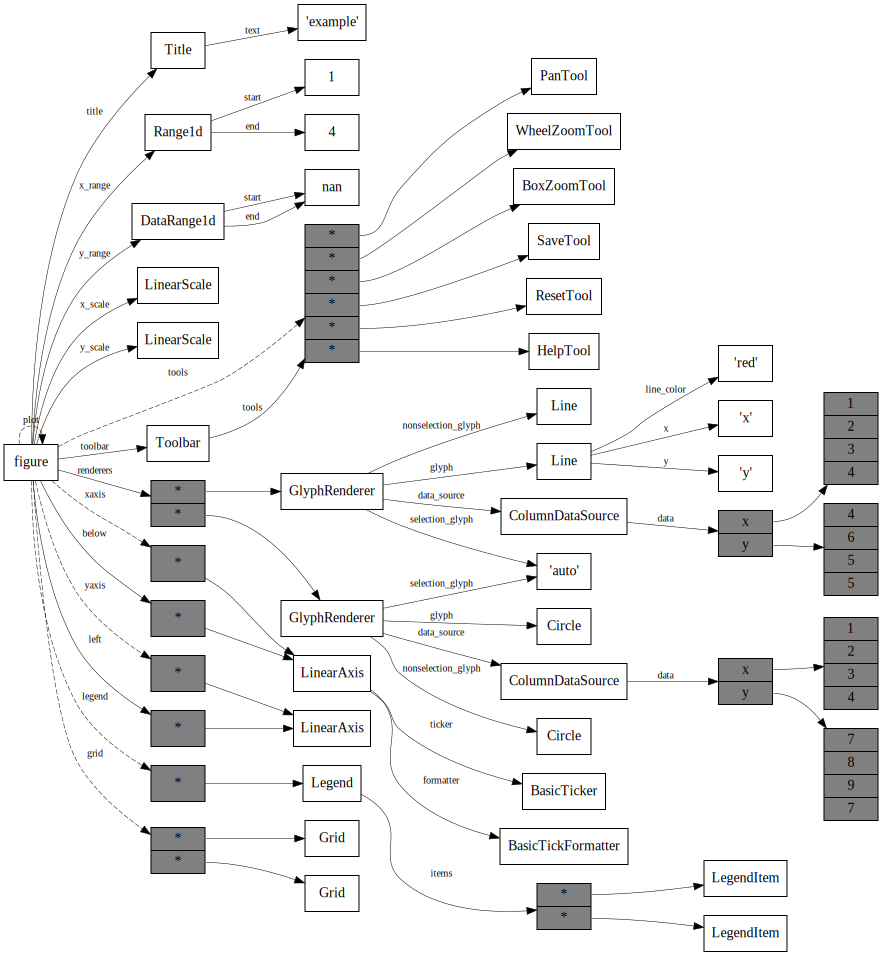

In [11]:
fig = figure(width=500, height=300, title="example", x_range=(1, 4))
line = fig.line([1, 2, 3, 4], [4, 6, 5, 5], color="red", legend_label="line1")
circle = fig.circle([1, 2, 3, 4], [7, 8, 9, 7], 0.05, color="green", legend_label="line2")

from helper.dot import GraphvizBokeh
import graphviz
graph = GraphvizBokeh.graphviz(fig)
graphviz.Source(graph)

各`Model`オブジェクトの属性を簡単に確認できるように、次のコードで`figure`オブジェクトをJSONデータに変換し、Notebookの表示機能を使用してJSONデータをツリーコントロールとして表示します。例えば、以下のプログラムは`fig`のすべての属性とその構造を表示します。

In [12]:
from IPython.display import display_json
show(fig)
display_json(fig.document.to_json(deferred=True)['roots'][0], raw=True)

### Bokeh属性

Bokeh属性はデータ型、データ検証などの機能をサポートしています。`HasProps`クラスの派生クラスはすべてBokeh属性をサポートしており、Bokeh属性に関する情報を取得するためのいくつかのメソッドも提供しています。`HasProps`オブジェクトのすべてのBokeh属性名は`properties()`メソッドで取得でき、すべての属性名とその値の辞書は`properties_with_values()`で取得できます。以下は`Figure`オブジェクトのすべてのBokeh属性名を表示します。

In [13]:
%col 4 fig.properties()

{'above',                       'align',                       'aspect_ratio',                'aspect_scale',               
 'attribution',                 'background_fill_alpha',       'background_fill_color',       'below',                      
 'border_fill_alpha',           'border_fill_color',           'center',                      'context_menu',               
 'css_classes',                 'css_variables',               'disabled',                    'elements',                   
 'extra_x_ranges',              'extra_x_scales',              'extra_y_ranges',              'extra_y_scales',             
 'flow_mode',                   'frame_align',                 'frame_height',                'frame_width',                
 'height',                      'height_policy',               'hidpi',                       'hold_render',                
 'inner_height',                'inner_width',                 'js_event_callbacks',          'js_property_callbacks',      


`properties_with_refs()`メソッドは、他のモデルオブジェクトを含むすべてのBokeh属性を取得します：

In [14]:
fig.properties_with_refs()

{'tags': List(AnyRef),
 'js_event_callbacks': Dict(String, List(Instance(Callback))),
 'js_property_callbacks': Dict(String, List(Instance(Callback))),
 'css_variables': Dict(String, Instance(Node)),
 'styles': Either(Dict(String, Nullable(String)), Instance(Styles)),
 'stylesheets': List(Either(Instance(StyleSheet), String, Dict(String, Either(Dict(String, Nullable(String)), Instance(Styles))))),
 'context_menu': Nullable(Instance(Menu)),
 'elements': List(Either(Instance(UIElement), Instance(DOMNode))),
 'x_range': Instance(Range),
 'y_range': Instance(Range),
 'x_scale': Instance(Scale),
 'y_scale': Instance(Scale),
 'extra_x_ranges': Dict(String, Instance(Range)),
 'extra_y_ranges': Dict(String, Instance(Range)),
 'extra_x_scales': Dict(String, Instance(Scale)),
 'extra_y_scales': Dict(String, Instance(Scale)),
 'title': Either(Null, Instance(Title)),
 'renderers': List(Instance(Renderer)),
 'toolbar': Instance(Toolbar),
 'left': List(Instance(Renderer)),
 'right': List(Instance(Re

`dataspecs()`メソッドは、データソースに接続できるすべての属性を取得します。例えば、以下は`Circle`図形オブジェクトの関連属性を表示します：

In [15]:
circle.glyph.dataspecs()

{'x': NumberSpec(String, Float, Instance(Value), Instance(Field), Instance(Expr), Struct(value=Float, transform=Instance(Transform)), Struct(field=String, transform=Instance(Transform)), Struct(expr=Instance(Expression), transform=Instance(Transform))),
 'y': NumberSpec(String, Float, Instance(Value), Instance(Field), Instance(Expr), Struct(value=Float, transform=Instance(Transform)), Struct(field=String, transform=Instance(Transform)), Struct(expr=Instance(Expression), transform=Instance(Transform))),
 'radius': DistanceSpec(units_default='data'),
 'line_color': ColorSpec(String, Nullable(Color), Instance(Value), Instance(Field), Instance(Expr), Struct(value=Nullable(Color), transform=Instance(Transform)), Struct(field=String, transform=Instance(Transform)), Struct(expr=Instance(Expression), transform=Instance(Transform))),
 'line_alpha': AlphaSpec(String, Float, Instance(Value), Instance(Field), Instance(Expr), Struct(value=Float, transform=Instance(Transform)), Struct(field=String, 

`loopkup()`メソッドは、指定された属性名に対応する属性ディスクリプタを取得します。以下は属性`toolbar_location`の属性ディスクリプタを取得し、属性ディスクリプタの`property`属性にその属性の型が保存されていることを示します。結果から、`toolbar_location`のデータ型は列挙型`Enum`であり、その選択肢は'above', 'below', 'left', 'right'の4つであることがわかります。

In [16]:
prop_desc = fig.lookup('toolbar_location')
print(prop_desc.property)

Nullable(Enum('above', 'below', 'left', 'right'))


`update()`属性は、キーワード引数を使用して複数のBokeh属性を同時に設定できます。例えば、以下のプログラムはX軸の表示範囲の開始値と終了値を設定します：

In [17]:
fig.x_range.update(start=1, end=5)

`to_json()`メソッドは、オブジェクトをJSONデータ構造に変換します。

### モデルオブジェクトのクエリ

各チャートは多くのモデルオブジェクトで構成される構造ツリーです。特定のモデルオブジェクトを見つけるためには、Bokeh属性を介して層ごとにアクセスする必要があります。モデルオブジェクトのアクセスを簡素化するために、`Model`クラスは`references()`、`select()`、`select_one()`メソッドを提供して、指定されたモデルオブジェクトをクエリします。`select()`は、すべての一致条件を満たすモデルのリストを返し、`select_one()`は単一の一致するモデルオブジェクトを返します。複数のモデルオブジェクトが一致する場合は例外がスローされます。一致条件は辞書を使用して指定します。例えば、以下のプログラムは、Bokeh属性`line_width`が`1`であるすべてのモデルオブジェクトを見つけます。

In [18]:
fig.references()

{AllIndices(id='p1310', ...),
 AllIndices(id='p1321', ...),
 AllLabels(id='p1282', ...),
 AllLabels(id='p1287', ...),
 AreaVisuals(id='p1297', ...),
 BasicTickFormatter(id='p1281', ...),
 BasicTickFormatter(id='p1286', ...),
 BasicTicker(id='p1280', ...),
 BasicTicker(id='p1285', ...),
 BoxAnnotation(id='p1292', ...),
 BoxInteractionHandles(id='p1298', ...),
 BoxZoomTool(id='p1291', ...),
 CDSView(id='p1309', ...),
 CDSView(id='p1320', ...),
 Circle(id='p1316', ...),
 Circle(id='p1317', ...),
 Circle(id='p1318', ...),
 ColumnDataSource(id='p1302', ...),
 ColumnDataSource(id='p1313', ...),
 DataRange1d(id='p1268', ...),
 GlyphRenderer(id='p1308', ...),
 GlyphRenderer(id='p1319', ...),
 Grid(id='p1283', ...),
 Grid(id='p1288', ...),
 HelpTool(id='p1301', ...),
 Legend(id='p1311', ...),
 LegendItem(id='p1312', ...),
 LegendItem(id='p1322', ...),
 Line(id='p1305', ...),
 Line(id='p1306', ...),
 Line(id='p1307', ...),
 LinearAxis(id='p1279', ...),
 LinearAxis(id='p1284', ...),
 LinearScale(

In [19]:
fig.select(dict(line_width=1))

[Circle(id='p1317', ...),
 Circle(id='p1318', ...),
 Line(id='p1307', ...),
 Line(id='p1306', ...),
 Line(id='p1305', ...),
 Circle(id='p1316', ...),
 AreaVisuals(id='p1297', ...)]

パラメータ`type`は、モデルタイプをクエリするために使用できます。以下では、`select()`を使用してすべての`Grid`オブジェクトを見つけ、その属性`grid_line_dash`を`'dotted'`に設定して、グリッドの線スタイルを点線に変更します。

In [20]:
from bokeh.models import Grid
for grid in fig.select(dict(type=Grid)):
    grid.grid_line_dash = "dotted"

`bokeh.core.query`モジュールでは、`IN`、`OR`、`GT`、`LT`などの一致演算子も提供されています。以下では、`IN`と`OR`を使用して、タイプが`Circle`または`Line`であるオブジェクトを選択します：

In [21]:
from bokeh.core.query import IN, OR
from bokeh.models import Circle, Line
fig.select(dict(type={IN: [Circle, Line]}))

[Circle(id='p1317', ...),
 Circle(id='p1318', ...),
 Line(id='p1307', ...),
 Line(id='p1306', ...),
 Line(id='p1305', ...),
 Circle(id='p1316', ...)]

In [22]:
fig.select({OR: [{"type": Circle}, {"type": Line}]})

[Circle(id='p1317', ...),
 Circle(id='p1318', ...),
 Line(id='p1307', ...),
 Line(id='p1306', ...),
 Line(id='p1305', ...),
 Circle(id='p1316', ...)]

複数のキーワード引数を使用する場合、`select()`はすべてのパラメータに一致するオブジェクトを返します。以下では、タイプが`Line`で、`line_color`属性が赤色であるオブジェクトを選択します：

In [23]:
fig.select(dict(type=Line, line_color="red"))

[Line(id='p1307', ...), Line(id='p1306', ...), Line(id='p1305', ...)]

`select()`を使用すると、指定された条件に一致するオブジェクトを見つけることができますが、そのオブジェクトが構造ツリー内のどこにあるかは示されません。本書で提供されている`find_path(root, target)`を使用すると、`root`オブジェクトから`target`オブジェクトへのパスを見つけることができます。例えば、以下は`Circle`と`Line`図形オブジェクトのパスを表示します：

In [24]:
from helper.bokeh import find_path

for model in fig.select(dict(type={IN: [Circle, Line]})):
    model_path = find_path(fig, model, root_name='fig')
    print(f'{model_path} : {model}')

fig.renderers[1].nonselection_glyph : Circle(id='p1317', ...)
fig.renderers[1].muted_glyph : Circle(id='p1318', ...)
fig.renderers[0].muted_glyph : Line(id='p1307', ...)
fig.renderers[0].nonselection_glyph : Line(id='p1306', ...)
fig.renderers[0].glyph : Line(id='p1305', ...)
fig.renderers[1].glyph : Circle(id='p1316', ...)


`find_path()`のパラメータ`all`が`True`の場合、すべてのパスを返します。例えば、折れ線を表す描画オブジェクトには2つのアクセスパスがあり、2番目のパスは凡例オブジェクトを介して取得されます：

In [25]:
for p in find_path(fig, line, root_name='fig', all=True):
    print(p)

print()
print(fig.center[2])

fig.renderers[0]
fig.center[2].items[0].renderers[0]

Legend(id='p1311', ...)


`set_select()`は、クエリ結果の属性を設定できます。最初のパラメータはクエリ用の辞書で、2番目のパラメータは属性名と属性値を保存する辞書です。例えば、以下のプログラムはチャート内のすべての`Line`オブジェクトの色を青色に変更します：

In [26]:
fig.set_select(dict(type=Line), dict(line_color='blue'))

`figure`オブジェクト内でクエリを行うことが多いため、`figure`クラスの`select()`は、キーワード引数を直接使用してクエリ条件を設定することをサポートしています。例えば：

In [27]:
fig.select(type={IN:[Circle, Line]})

[Circle(id='p1317', ...),
 Circle(id='p1318', ...),
 Line(id='p1307', ...),
 Line(id='p1306', ...),
 Line(id='p1305', ...),
 Circle(id='p1316', ...)]

In [28]:
fig.select(line_color="blue")

[Line(id='p1307', ...), Line(id='p1306', ...), Line(id='p1305', ...)]

### コールバック関数

`on_change()`メソッドを使用して、モデルオブジェクトに属性値が変更されたときのコールバック関数を追加できます。コールバック関数には、属性名、属性の元の値、新しい値の3つのパラメータがあります。`remove_on_change()`を使用して、指定されたコールバック関数を削除できます。例えば、以下の例では、`line.visible`の値が`True`から`False`に変更されると、`on_visible_changed()`が呼び出されます。モデルオブジェクトのコールバック関数は、Bokehサーバーを使用してチャートを表示する場合にのみ実際に機能します。関連する内容は、後の章で詳しく説明します。

In [29]:
def on_visible_changed(name, old, new):
    print(name, old, new)

line.visible = True
line.on_change('visible', on_visible_changed)
line.visible = False
line.remove_on_change('visible', on_visible_changed)

visible True False


Bokehチャートの描画作業はブラウザのJavaScriptで行われます。Pythonで作成されたすべてのモデルオブジェクトは、JavaScriptで対応するモデルオブジェクトが作成されます。`js_on_change()`を使用して、JavaScript内のモデルオブジェクトにコールバックコードを指定できます。最初のパラメータはコールバックコードをトリガーするイベント名で、2番目のパラメータはコールバックコードをラップする`CustomJS`オブジェクトです。`change:property_name`を使用して属性変更イベントを表すことができ、イベント名として属性名を直接使用することもできます。コールバック関数内では、`cb_obj`変数を使用してイベントをトリガーしたモデルオブジェクトにアクセスできます。`CustomJS`の`args`パラメータを使用して、他のモデルオブジェクトをコールバックコードに渡すことができます。

以下の例では、チャートのX軸表示範囲を表すオブジェクト`fig.x_range`の`start`属性値が変更されると、`callback`に設定されたコードが呼び出されます。JavaScriptコード内では、`line`変数は折れ線を表すモデルオブジェクトであり、`cb_obj`はX軸表示範囲を表すモデルオブジェクトです。`console.log()`を使用して、これら2つのオブジェクトをブラウザの開発ツールのコンソールに出力します。`console.log()`で出力されたオブジェクトは、そのすべての属性を確認できるため、モデルオブジェクトの内部構造を理解するのに役立ちます。

In [30]:
from bokeh.models import CustomJS

fig = figure(width=500, height=300, title="example", x_range=(1, 3))
line = fig.line([1, 2, 3], [4, 6, 5], color="red", legend_label="line1")

callback = CustomJS(args=dict(line=line), code='''
console.log(line, cb_obj);
''')

fig.x_range.js_on_change('start', callback)
show(fig)

### ウィジェットオブジェクト

`bokeh.models.widgets`モジュールでは、グラフィカルユーザーインターフェースを構成するために必要なさまざまなウィジェットクラスを提供しています。ほとんどのウィジェットには、ウィジェットの説明を表示するための`title`属性があり、`value`属性を使用してウィジェットの値を保存します。テキストラベルを直接表示できるウィジェットは、`label`属性を使用してテキストを保存します。例えば、ボタンウィジェットです。複数のラベルを持つウィジェットは、`labels`属性を使用してラベルのテキストリストを保存します。例えば、チェックボックスグループ`CheckBoxGroup`、ラジオグループ`RadioGroup`などです。候補値を持つウィジェットは、`options`属性を使用して候補値リストを保存します。例えば、単一選択ドロップダウン`Select`、複数選択`MultiSelect`などです。`value`属性を持つウィジェットは、`js_on_change()`と`on_change()`を使用して、JavaScriptとPythonでウィジェットのイベントに応答できます。ボタンクラスのウィジェットは、`js_on_click()`と`on_click()`を使用してマウスクリックイベントに応答することもできます。

読者が各ウィジェットの使用効果を簡単に理解できるように、以下のコードを使用して本書で提供されているウィジェットデモプログラムを実行できます。プログラムの出力は次のグラフのようになります。左側の選択ボックスからウィジェットのクラス名を選択し、`Create`ボタンをクリックして右側にそのウィジェットを作成します。ウィジェットを作成する際のパラメータ名とパラメータ値は、ウィジェットの上に表示されます。

In [31]:
from helper.bokeh import widgets_demo
widgets_demo()

### レイアウトオブジェクト

`bokeh.layouts`モジュールでは、`Row`、`Column`、`GridBox`の3つのレイアウトクラスを提供しており、これらは複数のチャートやウィジェットを配置するためのものです。これらはそれぞれ水平レイアウト、垂直レイアウト、グリッドレイアウトです。`layouts`モジュールを使用しやすくするために、`row()`、`column()`、`grid()`などのヘルパー関数を提供して、これらのレイアウトオブジェクトを作成します。`row()`と`column()`関数のパラメータは、要素オブジェクトのリスト、または複数の要素オブジェクトです。`grid()`のパラメータは、ネストされたリストを使用して2次元グリッドを表すか、1次元リストと`ncols`パラメータを使用してグリッドの列数を指定できます。

以下の例では、`row()`のパラメータは4つのオブジェクトを含むリストであり、`grid()`の要素リストパラメータは10個のオブジェクトを含み、`ncols`は5であるため、2行5列のグリッドを作成します。`column()`の2つのパラメータは、それぞれ`row()`と`grid()`で作成されたレイアウトオブジェクトであり、これら2つのオブジェクトを縦方向に配置します。プログラムの出力は次のグラフのようになります。

In [32]:
from bokeh.layouts import row, column, grid, Row, Column, GridBox
from bokeh.palettes import Category10_10
from bokeh.models import Div

layout = column(
    row([Div(width=65, height=50, background='lightgray') for i in range(4)]),
    grid([Div(width=50, height=50, background=color) for color in Category10_10], ncols=5)
)
show(layout)